In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('../../data/finland/sample_plots_all_features.csv')

In [4]:
df.head()

,plot_id,lon,lat,num_pine,vol_pine,num_spruce,vol_spruce,num_deciduous,vol_deciduous,number,...,era5_consecutive_dry_days_index_per_time_period,era5_number_of_cdd_periods_with_more_than_5days_per_time_period,era5_consecutive_wet_days_index_per_time_period,era5_number_of_cwd_periods_with_more_than_5days_per_time_period,era5_precipitation_days_index_per_time_period,era5_wet_days_index_per_time_period,era5_highest_one_day_precipitation_amount_per_time_period,era5_highest_five_day_precipitation_amount_per_time_period,era5_number_of_5day_heavy_precipitation_periods_per_time_period,era5_simple_daily_intensity_index_per_time_period
0,509711,23.760515,61.857391,629,239.3,79,27.6,118,11.3,825,...,32.0,212.0,31.0,69.0,2672.0,2672.0,64.8069,64.8069,31.0,5.286695
1,509712,23.776417,61.857257,668,129.7,118,16.5,393,28.6,1179,...,32.0,212.0,31.0,69.0,2672.0,2672.0,64.8069,64.8069,31.0,5.286695
2,509713,23.762006,61.854816,865,194.8,0,0.0,39,0.2,904,...,32.0,212.0,31.0,69.0,2672.0,2672.0,64.8069,64.8069,31.0,5.286695
3,509714,23.761818,61.852331,2358,130.1,236,4.4,472,6.4,3065,...,32.0,212.0,31.0,69.0,2672.0,2672.0,64.8069,64.8069,31.0,5.286695
4,509715,23.762492,61.850755,200,105.7,320,127.4,20,0.4,540,...,32.0,212.0,31.0,69.0,2672.0,2672.0,64.8069,64.8069,31.0,5.286695


In [5]:
df['dominant_species'].unique()

array(['pine', 'none', 'spruce', 'deciduous'], dtype=object)

In [6]:
df.columns

Index(['plot_id', 'lon', 'lat', 'num_pine', 'vol_pine', 'num_spruce',
       'vol_spruce', 'num_deciduous', 'vol_deciduous', 'number', 'volume',
       'diameter', 'height', 'age', 'ratio_pine', 'ratio_spruce',
       'ratio_deciduous', 'dominant_species',
       'uerra_consecutive_frost_days_index_per_time_period',
       'uerra_number_of_cfd_periods_with_more_than_5days_per_time_period',
       'uerra_frost_days_index_per_time_period',
       'uerra_consecutive_summer_days_index_per_time_period',
       'uerra_number_of_csu_periods_with_more_than_5days_per_time_period',
       'uerra_ice_days_index_per_time_period',
       'uerra_summer_days_index_per_time_period',
       'uerra_consecutive_dry_days_index_per_time_period',
       'uerra_number_of_cdd_periods_with_more_than_5days_per_time_period',
       'uerra_consecutive_wet_days_index_per_time_period',
       'uerra_number_of_cwd_periods_with_more_than_5days_per_time_period',
       'uerra_precipitation_days_index_per_time_period',

In [7]:
columns = [c for c in df.columns if 'era5' in c]

In [8]:
columns

['era5_number_of_cfd_periods_with_more_than_5days_per_time_period',
 'era5_frost_days_index_per_time_period',
 'era5_number_of_csu_periods_with_more_than_5days_per_time_period',
 'era5_ice_days_index_per_time_period',
 'era5_summer_days_index_per_time_period',
 'era5_consecutive_dry_days_index_per_time_period',
 'era5_number_of_cdd_periods_with_more_than_5days_per_time_period',
 'era5_consecutive_wet_days_index_per_time_period',
 'era5_number_of_cwd_periods_with_more_than_5days_per_time_period',
 'era5_precipitation_days_index_per_time_period',
 'era5_wet_days_index_per_time_period',
 'era5_highest_one_day_precipitation_amount_per_time_period',
 'era5_highest_five_day_precipitation_amount_per_time_period',
 'era5_number_of_5day_heavy_precipitation_periods_per_time_period',
 'era5_simple_daily_intensity_index_per_time_period']

In [9]:
X = df[columns]

In [10]:
X.head()

,era5_number_of_cfd_periods_with_more_than_5days_per_time_period,era5_frost_days_index_per_time_period,era5_number_of_csu_periods_with_more_than_5days_per_time_period,era5_ice_days_index_per_time_period,era5_summer_days_index_per_time_period,era5_consecutive_dry_days_index_per_time_period,era5_number_of_cdd_periods_with_more_than_5days_per_time_period,era5_consecutive_wet_days_index_per_time_period,era5_number_of_cwd_periods_with_more_than_5days_per_time_period,era5_precipitation_days_index_per_time_period,era5_wet_days_index_per_time_period,era5_highest_one_day_precipitation_amount_per_time_period,era5_highest_five_day_precipitation_amount_per_time_period,era5_number_of_5day_heavy_precipitation_periods_per_time_period,era5_simple_daily_intensity_index_per_time_period
0,111.0,2888.0,88.0,1428.0,2040.0,32.0,212.0,31.0,69.0,2672.0,2672.0,64.8069,64.8069,31.0,5.286695
1,111.0,2888.0,88.0,1428.0,2040.0,32.0,212.0,31.0,69.0,2672.0,2672.0,64.8069,64.8069,31.0,5.286695
2,111.0,2888.0,88.0,1428.0,2040.0,32.0,212.0,31.0,69.0,2672.0,2672.0,64.8069,64.8069,31.0,5.286695
3,111.0,2888.0,88.0,1428.0,2040.0,32.0,212.0,31.0,69.0,2672.0,2672.0,64.8069,64.8069,31.0,5.286695
4,111.0,2888.0,88.0,1428.0,2040.0,32.0,212.0,31.0,69.0,2672.0,2672.0,64.8069,64.8069,31.0,5.286695


In [11]:
y = df['dominant_species']

In [12]:
y.unique()

array(['pine', 'none', 'spruce', 'deciduous'], dtype=object)

In [13]:
le = LabelEncoder()

In [14]:
le.fit(df['dominant_species'])

LabelEncoder()

In [15]:
le.classes_

array(['deciduous', 'none', 'pine', 'spruce'], dtype=object)

In [16]:
y = le.transform(df['dominant_species'])

In [17]:
le.classes_

array(['deciduous', 'none', 'pine', 'spruce'], dtype=object)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [19]:
parameters = {'n_estimators': [100, 300, 500], 'max_depth': [10, 12, 14]}

In [20]:
clf = GridSearchCV(RandomForestClassifier(), cv=3, param_grid=parameters, verbose=9)

In [21]:
np.unique(y_train)

array([0, 1, 2, 3])

In [22]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=10, n_estimators=100, score=0.485, total=   0.6s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.485, total=   0.6s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.495, total=   0.6s
[CV] max_depth=10, n_estimators=300 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=300, score=0.485, total=   1.8s
[CV] max_depth=10, n_estimators=300 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=300, score=0.483, total=   1.8s
[CV] max_depth=10, n_estimators=300 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=300, score=0.495, total=   1.8s
[CV] max_depth=10, n_estimators=500 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=500, score=0.485, total=   3.0s
[CV] max_depth=10, n_estimators=500 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=500, score=0.485, total=   2.9s
[CV] max_depth=10, n_estimators=500 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=500, score=0.493, total=   3.0s
[CV] max_depth=12, n_estimators=100 ..................................
[CV] ...... max_depth=12, n_estimators=100, score=0.482, total=   0.6s
[CV] max_depth=12, n_estimators=100 ..................................
[CV] ...... max_depth=12, n_estimators=100, score=0.482, total=   0.7s
[CV] max_depth=12, n_estimators=100 ..................................
[CV] ...... max_depth=12, n_estimators=100, score=0.494, total=   0.7s
[CV] max_depth=12, n_estimators=300 ..................................
[CV] ...... max_depth=12, n_estimators=300, score=0.480, total=   2.1s
[CV] max_depth=12, n_estimators=300 ..................................
[CV] ...... max_depth=12, n_estimators=300, score=0.483, total=   2.0s
[CV] max_depth=12, n_estimators=300 ..................................
[CV] ...... max_depth=12, n_estimators=300, score=0.496, total=   1.9s
[CV] max_depth=12, n_estimators=500 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   52.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [23]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_pred = clf.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.499916149589133

In [ ]:
cm = confusion_matrix(y_pred, y_test)

# Pine Classifier

In [30]:
df['target'] = np.where(df['dominant_species'] == 'pine', 1, 0)

In [31]:
y_pine = df['target']

In [32]:
X_pine_resampled, y_pine_resampled = SMOTE().fit_resample(X, y_pine)

In [33]:
X_pine_train, X_pine_test, y_pine_train, y_pine_test = train_test_split(X_pine_resampled, y_pine_resampled, train_size=0.7)

In [34]:
pine_parameters = {'n_estimators': [10, 50, 100], 'max_depth': [50, 75, 100]}

In [35]:
clf_pine = GridSearchCV(RandomForestClassifier(), cv=3, param_grid=pine_parameters, verbose=9)

In [36]:
clf_pine.fit(X_pine_train, y_pine_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=50, n_estimators=10 ...................................
[CV] ....... max_depth=50, n_estimators=10, score=0.645, total=   0.1s
[CV] max_depth=50, n_estimators=10 ...................................
[CV] ....... max_depth=50, n_estimators=10, score=0.649, total=   0.1s
[CV] max_depth=50, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ....... max_depth=50, n_estimators=10, score=0.654, total=   0.1s
[CV] max_depth=50, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ....... max_depth=50, n_estimators=50, score=0.650, total=   0.4s
[CV] max_depth=50, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV] ....... max_depth=50, n_estimators=50, score=0.651, total=   0.4s
[CV] max_depth=50, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s


[CV] ....... max_depth=50, n_estimators=50, score=0.656, total=   0.4s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.3s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.650, total=   0.7s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.650, total=   0.7s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.8s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.651, total=   0.7s
[CV] max_depth=75, n_estimators=10 ...................................
[CV] ....... max_depth=75, n_estimators=10, score=0.645, total=   0.1s
[CV] max_depth=75, n_estimators=10 ...................................
[CV] ....... max_depth=75, n_estimators=10, score=0.650, total=   0.1s
[CV] max_depth=75, n_estimators=10 ...................................
[CV] ....... max_depth=75, n_estimators=10, score=0.654, total=   0.1s
[CV] max_depth=75, n_estimators=50 ...................................
[CV] ....... max_depth=75, n_estimators=50, score=0.648, total=   0.4s
[CV] max_depth=75, n_estimators=50 ...................................
[CV] ....... max_depth=75, n_estimators=50, score=0.647, total=   0.4s
[CV] max_depth=75, n_estimators=50 ...................................
[CV] ....... max_depth=75, n_estimators=50, score=0.653, total=   0.4s
[CV] max_depth=75, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   10.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [37]:
y_pine_pred = clf_pine.predict(X_pine_test)

In [38]:
accuracy_score(y_pine_pred, y_pine_test)

0.6457457133613718

In [39]:
precision_score(y_pine_pred, y_pine_test)

0.5943025540275049

In [40]:
recall_score(y_pine_pred, y_pine_test)

0.6561822125813449

In [41]:
cm = confusion_matrix(y_pine_pred, y_pine_test)
cm

array([[2177, 1239],
       [ 951, 1815]])

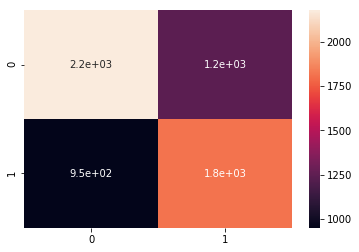

In [42]:
sn.heatmap(cm, annot=True)

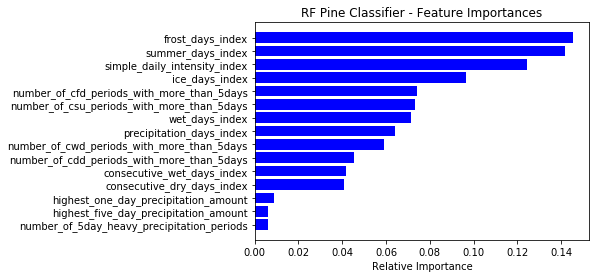

In [39]:
features = [c[5:-16] for c in X.columns]
importances = clf_pine.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('RF Pine Classifier - Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Spruce

In [40]:
df['target'] = np.where(df['dominant_species'] == 'spruce', 1, 0)

In [41]:
y_spruce = df['target']

In [42]:
X_spruce_resampled, y_spruce_resampled = SMOTE().fit_resample(X, y_spruce)

In [43]:
X_spruce_train, X_spruce_test, y_spruce_train, y_spruce_test = train_test_split(X_spruce_resampled, y_spruce_resampled, train_size=0.7)

In [44]:
spruce_parameters = {'n_estimators': [100], 'max_depth': [10, 25, 50, 100]}

In [45]:
clf_spruce = GridSearchCV(RandomForestClassifier(), param_grid=spruce_parameters, cv=10, verbose=9)

In [46]:
clf_spruce.fit(X_spruce_train, y_spruce_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=10, n_estimators=100, score=0.668, total=   1.2s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.680, total=   1.2s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.699, total=   1.2s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.667, total=   1.3s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.680, total=   1.2s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.662, total=   1.2s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.3s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.694, total=   1.2s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.5s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.706, total=   1.2s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.7s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.692, total=   1.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.694, total=   1.2s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] ...... max_depth=25, n_estimators=100, score=0.679, total=   1.3s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] ...... max_depth=25, n_estimators=100, score=0.687, total=   1.4s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] ...... max_depth=25, n_estimators=100, score=0.705, total=   1.4s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] ...... max_depth=25, n_estimators=100, score=0.678, total=   1.4s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] ...... max_depth=25, n_estimators=100, score=0.681, total=   1.4s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   54.4s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [47]:
clf_spruce.best_params_

{'max_depth': 25, 'n_estimators': 100}

In [48]:
y_spruce_pred = clf_spruce.predict(X_spruce_test)

In [49]:
accuracy_score(y_spruce_pred, y_spruce_test)

0.6896446078431373

In [50]:
confusion_matrix(y_spruce_pred, y_spruce_test)

array([[2743,  913],
       [2126, 4010]])

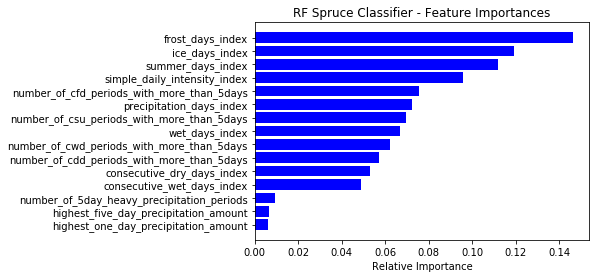

In [52]:
features = [c[5:-16] for c in X.columns]
importances = clf_spruce.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('RF Spruce Classifier - Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()